In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
from dnn.ak_sample_loader import *

In [2]:
input_full = AkSampleLoader("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/histo/histo_*.root", shouldSplitEndcaps=False)


In [3]:
input_full.saveToPickle("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples_v2/fullData.pkl")

In [4]:
input_full.tracksters_splitEndcaps

<Array [[{NClusters: 322, ...}, ...], ...] type='93780 * var * trackster[NC...'>

In [16]:
input_full.selectMainTrackster().tracksters_splitEndcaps

<Array [[{NClusters: 322, ...}], ..., [{...}]] type='93780 * var * trackste...'>

In [24]:
from dnn.torch_dataset import makeSelectedInputSample
input_full.selectMainTrackster().makeDataAk()

<Array [[[103, 2.26, 347, ..., 0, 0, 0]], ...] type='93780 * var * 10 * flo...'>

In [37]:
input_full.caloparticles.regressed_energy[:, 0]

<Array [196, 245, 300, 529, ..., 13.4, 494, 459, 353] type='100000 * float32'>

(array([2.880e+02, 1.640e+02, 1.200e+02, 1.570e+02, 2.030e+02, 2.780e+02,
        3.490e+02, 4.690e+02, 5.960e+02, 6.480e+02, 7.630e+02, 9.200e+02,
        1.079e+03, 1.284e+03, 1.456e+03, 1.656e+03, 1.925e+03, 2.161e+03,
        2.298e+03, 2.461e+03, 2.621e+03, 2.645e+03, 2.639e+03, 2.799e+03,
        2.745e+03, 2.856e+03, 2.873e+03, 2.916e+03, 2.939e+03, 2.974e+03,
        2.887e+03, 2.921e+03, 2.904e+03, 2.921e+03, 2.910e+03, 2.848e+03,
        2.764e+03, 2.692e+03, 2.524e+03, 2.421e+03, 2.330e+03, 2.052e+03,
        2.021e+03, 1.756e+03, 1.626e+03, 1.429e+03, 1.220e+03, 1.071e+03,
        8.700e+02, 7.920e+02, 6.390e+02, 5.730e+02, 4.590e+02, 3.270e+02,
        3.060e+02, 2.400e+02, 1.760e+02, 1.780e+02, 1.390e+02, 1.290e+02,
        9.900e+01, 9.500e+01, 5.600e+01, 3.500e+01, 2.700e+01, 2.800e+01,
        8.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+0

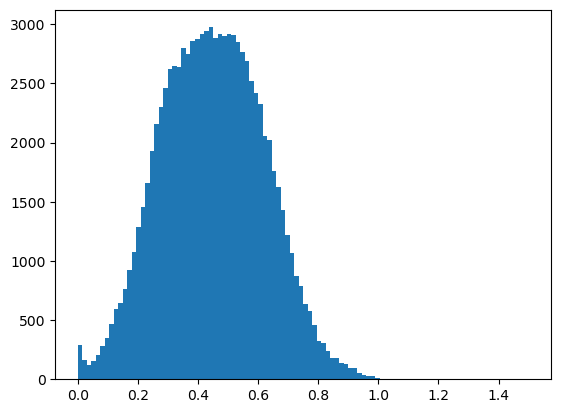

In [39]:
ar = ak.sort(input_full.tracksters.raw_energy, ascending=False)
import matplotlib.pyplot as plt
plt.hist(ar[ak.num(ar, axis=-1) > 0][:, 0] / input_full.caloparticles.regressed_energy[:, 0][ak.num(ar, axis=-1) > 0], bins=100, range=(0, 1.5))

(array([6.018e+03, 1.620e+02, 1.080e+02, 1.240e+02, 1.350e+02, 1.720e+02,
        1.850e+02, 2.150e+02, 2.700e+02, 2.550e+02, 2.900e+02, 3.430e+02,
        4.150e+02, 4.190e+02, 4.490e+02, 5.140e+02, 5.740e+02, 5.670e+02,
        6.260e+02, 7.690e+02, 7.900e+02, 8.580e+02, 9.380e+02, 1.086e+03,
        1.209e+03, 1.330e+03, 1.443e+03, 1.686e+03, 1.852e+03, 1.978e+03,
        2.217e+03, 2.357e+03, 2.542e+03, 2.932e+03, 3.233e+03, 3.413e+03,
        3.588e+03, 4.031e+03, 4.171e+03, 4.120e+03, 4.323e+03, 4.242e+03,
        4.202e+03, 4.001e+03, 3.802e+03, 3.397e+03, 3.103e+03, 2.638e+03,
        2.243e+03, 1.887e+03, 1.529e+03, 1.272e+03, 1.054e+03, 7.800e+02,
        6.480e+02, 4.450e+02, 3.750e+02, 2.810e+02, 2.180e+02, 1.870e+02,
        1.270e+02, 1.320e+02, 8.400e+01, 6.000e+01, 3.700e+01, 3.300e+01,
        1.400e+01, 8.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+0

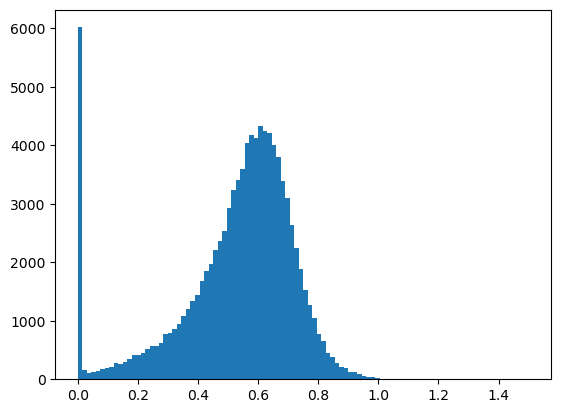

In [40]:

plt.hist(ak.sum(input_full.tracksters.raw_energy, axis=-1) / input_full.caloparticles.regressed_energy[:, 0], bins=100, range=(0, 1.5))